# Import
*   libraries
*   drive
*   df

**Luqman**
autoscout24-germany-dataset.csv
Cardekho_Extract.csv --> check Adhyta

**Giuliana**
vehicles.csv
cars.csv


STAGE 1. ETL
1. Col --> drop columns not useful (e.g. URL, null, etc.)
2. Row --> drop duplicate rows (100%)
3. Change to correct data type (e.g. str to numeric, delete str and keep numeric, etc.)
4. Categorizing string values (e.g. condition of the car) (at the same time, get rid of salvage condition cars, usless for model)
5. Check for Outliers & clean (price)

--------------------------
STAGE 2. EXPORT CSV 
1. Share to team

--------------------------
STAGE 3. MERGE --> We communicate which common columns:
1. Price
2. Location
3. Condition 
4. Cyilinders
5. ....








In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns

!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

     |████████████████████████████████| 50 kB 2.6 MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149867 sha256=3153780d565480d9befe3679293a78864837e8804600eb4a2d043d9c144599b1
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-levenshtein


In [ ]:
import matplotlib.pyplot as plt
!pip install plotly
!pip install cufflinks
import plotly.express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`



In [ ]:
!pip install geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

     |████████████████████████████████| 994 kB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 45.5 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("filepath_or_buffer", index_col=None)
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv", index_col=0)
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cars.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/autoscout24-germany-dataset.csv")

# df1
*   describe
*   clean
*   analyze





In [ ]:
df = df1

In [ ]:
#get number of rows & cols
df.shape

(426880, 25)

In [ ]:
#get number of elements
df.size

10672000

In [ ]:
#get head
df.head(n=5)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  obje

In [ ]:
#get descriptive stats
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
#get sum nan
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
#get sum non nan
df.notnull().sum()

url             426880
region          426880
region_url      426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
county               0
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [ ]:
#drop rows: sum nan <19
df = df[df.isnull().sum(axis=1) < 19]
df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [ ]:
#drop cols: county, url, region_url, image_url, description
df.drop('county', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
df.drop('VIN', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [ ]:
#float to int: year
df['year'] = df['year'].astype('Int32') #--> fillna() vs Int32 vs dropna(subset='a') --> drop 1205
assert df['year'].dtype == 'Int32'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#str to int: cylinder
df['cylinders'] = df['cylinders'].str.replace('cylinders',' ')
df['cylinders'] = df['cylinders'].str.strip()
df['cylinders'] = df['cylinders'].replace('nan',np.nan)
df['cylinders'] = df['cylinders'].replace('other','0') #--> Dummy? merge nan and 0
df['cylinders'] = df['cylinders'].astype('float') #--> bug
df['cylinders'] = df['cylinders'].astype('Int32')
df['cylinders'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

<IntegerArray>
[8, 6, <NA>, 4, 5, 0, 3, 10, 12]
Length: 9, dtype: Int32

In [ ]:
#remove duplicate rows --> print and check, remove before  (better check posting date)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(426786, 19)

In [ ]:
#categorize nan (不需要吧) en
df['manufacturer'] = df['manufacturer'].replace('nan',np.nan)
df['model'] = df['model'].replace('nan',np.nan)
df['condition'] = df['condition'].replace('nan',np.nan)
df['fuel'] = df['fuel'].replace('nan',np.nan)
df['title_status'] = df['title_status'].replace('nan',np.nan)
df['transmission'] = df['transmission'].replace('nan',np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df['lat'].describe() #min & max 好了

count    420305.000000
mean         38.493726
std           5.841535
min         -84.122245
25%          34.601900
50%          39.150100
75%          42.398900
max          82.390818
Name: lat, dtype: float64

In [ ]:
print(df['price'].max())
print(df['price'].min()) #check plt, drop % outliers
print(df['price'].mean())
print(df['price'].median())

3736928711
0
75212.57492513812
13950.0


In [ ]:
df['condition'].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [ ]:
def condition_to_numeric(x):
  if x=='new': return 5
  if x=='like new': return 4
  if x=='excellent': return 3
  if x=='good': return 2
  if x=='fair': return 1
  if x=='salvage': return 0 #--> ditch
  if x=='nan': return np.nan

df['condition_num'] = df['condition'].apply(condition_to_numeric)
df['condition_num'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 2.,  3.,  1., nan,  4.,  5.,  0.])

                  price      year  cylinders  ...       lat      long  condition_num
price          1.000000 -0.001532   0.005894  ...  0.003988 -0.008064       0.000509
year          -0.001532  1.000000  -0.190669  ... -0.011861  0.030050       0.263669
cylinders      0.005894 -0.190669   1.000000  ... -0.033751  0.023630      -0.066409
odometer       0.000621 -0.091027   0.039496  ... -0.007803 -0.000513      -0.096553
lat            0.003988 -0.011861  -0.033751  ...  1.000000 -0.044292      -0.067933
long          -0.008064  0.030050   0.023630  ... -0.044292  1.000000      -0.022834
condition_num  0.000509  0.263669  -0.066409  ... -0.067933 -0.022834       1.000000

[7 rows x 7 columns]


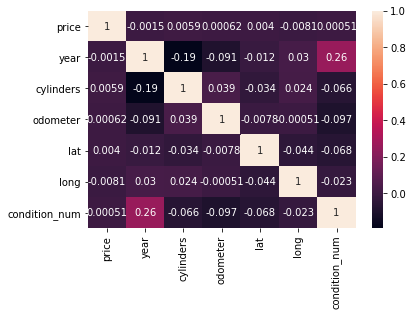

In [ ]:
#corr matrix
df = df.dropna() #--> IF only, check
print(df.corr())
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#corr p-value
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
calculate_pvalues(df)

,price,year,cylinders,odometer,lat,long,condition_num
price,0,0.6667,0.0976,0.8615,0.2623,0.0234,0.8862
year,0.6667,0,0,0,0.0009,0,0
cylinders,0.0976,0,0,0,0,0,0
odometer,0.8615,0,0,0,0.0283,0.8854,0
lat,0.2623,0.0009,0,0.0283,0,0,0
long,0.0234,0,0,0.8854,0,0,0
condition_num,0.8862,0,0,0,0,0,0


In [ ]:
#corr p-value check
pearsonr(df['year'], df['condition_num']) #--> p<0.05 corr coeff significant? other test?

(0.2636692948767122, 0.0)

In [ ]:
#geocode
px.scatter_mapbox(df, lat='lat', lon='long',zoom=3, mapbox_style='carto-positron', hover_name="model", title='US Used Cars')

In [ ]:
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min]) #-->min price too low? subset?

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.413747e+04,20499.5,116000,0
al,1.546960e+04,10950.0,140000,0
ar,1.170382e+04,7500.0,87700,0
az,1.356708e+04,10000.0,123456,0
ca,1.452278e+05,9225.0,1111111111,0
co,1.214589e+04,8995.0,150000,0
ct,9.762674e+03,6495.0,76000,0
dc,1.022732e+04,7495.0,89000,1


In [ ]:
df = df[df['price'] >=50] #-->e.g.
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min]) #try plot w condition/if salvage > then 

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.432933e+04,20900.0,116000,450
al,1.661691e+04,11987.0,140000,300
ar,1.504775e+04,10500.0,87700,499
az,1.364317e+04,10000.0,123456,100
ca,1.525270e+05,9950.0,1111111111,55
co,1.229617e+04,9000.0,150000,500
ct,1.073336e+04,6995.0,76000,600
dc,1.024849e+04,7495.0,89000,65


Text(0, 0.5, 'Sales adverts')

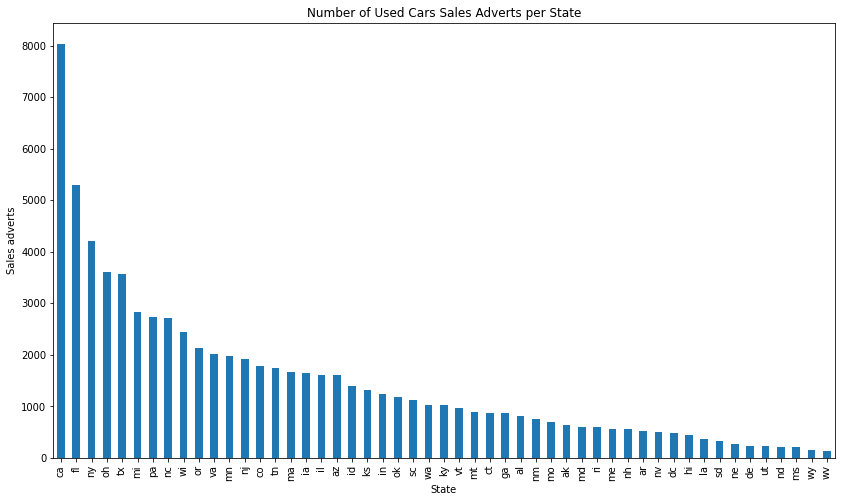

In [ ]:
#distribution bar chart --> state/sales adverts
plt = df['state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per State")
plt.set_xlabel("State")
plt.set_ylabel("Sales adverts")

Text(0, 0.5, 'Sales adverts')

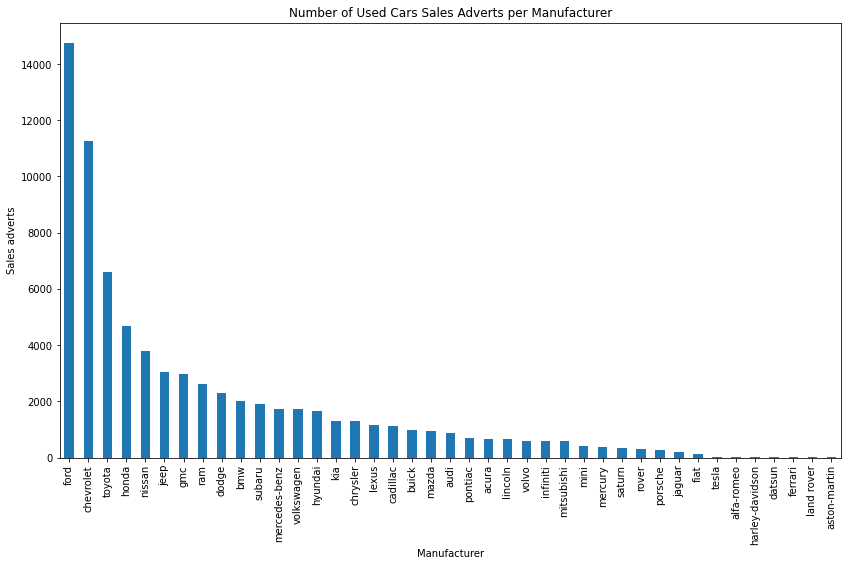

In [ ]:
#distribution bar chart --> brand/sales adverts
ax = df['manufacturer'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per Manufacturer")
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Sales adverts")

   state         price
0     ak  2.432933e+04
1     al  1.661691e+04
2     ar  1.504775e+04
3     az  1.364317e+04
4     ca  1.525270e+05
5     co  1.229617e+04
6     ct  1.073336e+04
7     dc  1.024849e+04
8     de  1.466202e+04
9     fl  1.458589e+04
10    ga  1.369055e+04
11    hi  1.863727e+04
12    ia  1.474014e+04
13    id  1.159150e+05
14    il  1.198052e+04
15    in  1.270337e+04
16    ks  1.305239e+04
17    ky  1.538807e+04
18    la  1.201520e+04
19    ma  1.239471e+04
20    md  1.171574e+04
21    me  1.542471e+04
22    mi  1.582690e+04
23    mn  1.418454e+04
24    mo  1.555466e+04
25    ms  1.835164e+04
26    mt  1.798690e+04
27    nc  6.528308e+04
28    nd  1.848061e+04
29    ne  1.527632e+04
30    nh  1.233658e+04
31    nj  1.092359e+04
32    nm  1.520956e+04
33    nv  1.276176e+04
34    ny  1.332985e+04
35    oh  1.000936e+04
36    ok  1.210552e+05
37    or  1.758857e+06
38    pa  1.091515e+04
39    ri  1.116992e+04
40    sc  1.493459e+04
41    sd  1.780077e+04
42    tn  1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



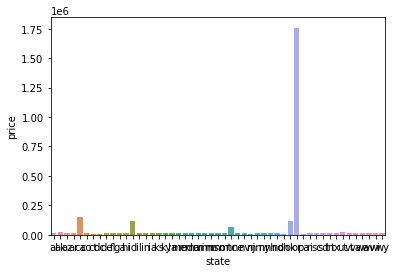

In [ ]:
#distribution bar chart --> state/ASP
print(df.groupby('state', as_index=False)['price'].mean())
plt2 = sns.barplot('state', 'price', data=df, ci=False)

       manufacturer          price
0             acura    9721.315789
1        alfa-romeo   21795.964286
2      aston-martin   53367.000000
3              audi   14368.030233
4               bmw   13525.576347
5             buick  133195.087349
6          cadillac   12530.580444
7         chevrolet   15740.334132
8          chrysler    7928.861515
9            datsun   13434.928571
10            dodge   11550.771838
11          ferrari  102163.666667
12             fiat    9166.235772
13             ford   92556.297224
14              gmc   61333.887882
15  harley-davidson   14496.423077
16            honda    8901.928084
17          hyundai    8276.562950
18         infiniti   12607.111675
19           jaguar   14958.410628
20             jeep   14601.180231
21              kia    8614.071374
22       land rover   18116.875000
23            lexus   13762.790476
24          lincoln   10924.584759
25            mazda    8445.863347
26    mercedes-benz   15086.885189
27          mercury 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



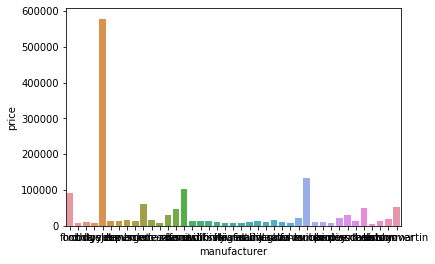

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer', as_index=False)['price'].mean()) #check ferrari etc. 100k > subset drop and graph
plt2 = sns.barplot('manufacturer', 'price', data=df, ci=False)

In [ ]:
#ditch salvage. but dont delete them rather keep them separately. tell outliers to server.